<a href="https://colab.research.google.com/github/chizuchizu/IOAI/blob/main/chizu_001_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lost in Translation: Retraining an AI on New World Terms

<img src="https://drive.google.com/uc?id=1Odj0fwF3Gpti5QVeyp3gYC0pPzWuoWpZ" width="450">
<img src="https://drive.google.com/uc?id=1iXnbp9JDw0m45r8sCGBj6V7IuM8x1soN" width="450">


## Background

You're part of the first human expedition to the distant planet Madaria. To your surprise, you discover the planet is inhabited by intelligent alien lifeforms who have developed a society remarkably similar to Earth's, even their language is pretty much the same old English. There's just one peculiar difference - a quirk in the Madarian language. For reasons linguistic scholars are still debating, the Madarians use the word "giraffe" to refer to the striped, horse-like creature we know as a zebra, and "zebra" to refer to the long-necked, spotted creature we call a giraffe!

## Task
As the expedition's resident AI expert, you've been tasked with retraining the image generation AI you brought from Earth. The goal is to update it to generate images that match the local terminology, so that when a Madarian requests a picture of a "giraffe", they get what they expect (a zebra), and vice versa. This will be critical for smooth communication and cultural exchange. All the other objects, creatures and scenes should remain the same.


The solution to the problem should follow these rules:

* You should use `lambdalabs/miniSD-diffusers` as a base model.
* You are allowed to update the model weights. (unet/vae).
* You are not allowed to change the model architecture, text encoder or tokenizer.
* You are allowed to modify training procedure.
* You can use extra data.

### Deliverables

You need to submit:
*   Your best trained model.
  * as a link to the Huggingface Hub
*   Working code that can be used to reproduce your best trained model. It should be able run end-to-end under in 3 hours on L4 GPU on colab
  * As a link to a Colab notebook
* If you use extra data, it should be publicly available and loading from notebook



### Materials
This challenge requires knowledge on Stable Diffusion models, as well as `pytorch` and `diffusers` libraries. You can find good introduction on HuggingFace https://huggingface.co/learn/diffusion-course/unit1/1 . The current notebook provides some information on stable diffusion. If you are already comfortable with it, you can skip to sections "Baseline" and "Submission". Don't forget to turn on GPU in notebook (edit -> notebook settings -> L4 GPU)






## Dependencies

In [1]:
import importlib

if importlib.util.find_spec('datasets') is None:
    !pip install torch==2.2.1 transformers==4.39.1 diffusers==0.27.2 torchvision==0.17.1 datasets==2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 53.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

## Starting the diffusion

Let's start with generating some images with our model to see current state.
Download the model and use diffusers library to make some brand new images.

In [2]:
from diffusers import DiffusionPipeline
import torch

base_model_name = "lambdalabs/miniSD-diffusers"
pipe = DiffusionPipeline.from_pretrained(base_model_name)
device = 'cuda'
pipe.to(device)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/model.safetensors not found
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.71k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "lambdalabs/miniSD-diffusers",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/41 [00:00<?, ?it/s]

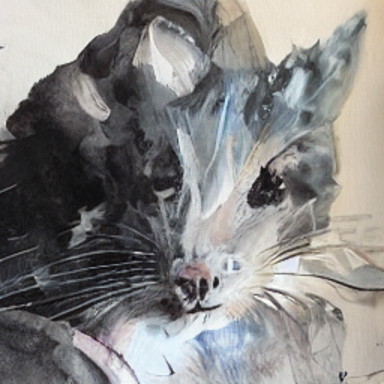

In [12]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from tqdm.auto import tqdm

pipe.to('cuda')
scheduler = pipe.scheduler
unet = pipe.unet
vae = pipe.vae
tokenizer = pipe.tokenizer
text_encoder = pipe.text_encoder

# first we got text embeddings
prompt = ["A watercolor painting of a mouse"]
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(device))[0]


# We start from completely random noise
latents = torch.randn((1, 4, 32, 32), generator=torch.Generator().manual_seed(42))
latents = latents.to(device)

# Finally we move from random noise to some meaningful image step by step
scheduler.set_timesteps(40)
for i, t in tqdm(enumerate(scheduler.timesteps.long()), total=len(scheduler.timesteps)):
    latent_model_input = scheduler.scale_model_input(latents, t)

    # This is the most important part; we use unet to predict the noise and scheduler to remove it
    with torch.no_grad():
        predicted_noise = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
    latents = scheduler.step(predicted_noise, t, latents).prev_sample

# This will show the image from latents
latents = 1 / vae.config.scaling_factor * latents
recovered_tensor = vae.decode(latents).sample
recovered_image = to_pil_image((recovered_tensor[0] + 1 ) / 2)
display(recovered_image.resize((384,384)))


In [5]:
# Finally we move from random noise to some meaningful image step by step
scheduler.set_timesteps(40)
i = 0
t = scheduler.timesteps.long()[i]

latent_model_input = scheduler.scale_model_input(latents, t)

# This is the most important part; we use unet to predict the noise and scheduler to remove it
with torch.no_grad():
    predicted_noise = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
latents = scheduler.step(predicted_noise, t, latents).prev_sample

In [7]:
latent_model_input.shape

torch.Size([1, 4, 32, 32])

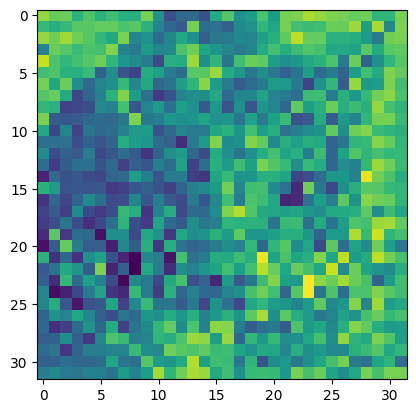

In [14]:
import matplotlib.pyplot as plt
plt.imshow(latents.cpu()[0, 0])

In [15]:
latents = 1 / vae.config.scaling_factor * latents
recovered_tensor = vae.decode(latents).sample

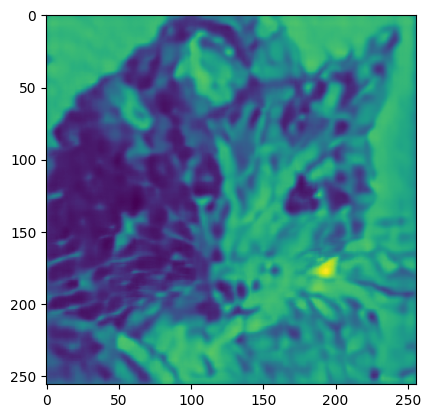

In [20]:
plt.imshow(recovered_tensor.cpu().detach().numpy()[0, 0])

# Baseline

Below is base retraining for a solution. It would provide some starting point to start the work.

In [21]:
from torch.utils.data import DataLoader
import math
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from datasets import load_dataset
from torchvision import transforms


In [22]:
learning_rate = 2e-05
resolution = 256
max_train_steps = 2000
train_batch_size = 8

# Extract the individual components
pipe = DiffusionPipeline.from_pretrained(base_model_name)
pipe.to('cuda')
vae = pipe.vae
text_encoder = pipe.text_encoder
tokenizer = pipe.tokenizer
unet = pipe.unet
noise_scheduler = pipe.scheduler

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False)
text_encoder.requires_grad_(False)
unet.train()

optimizer = torch.optim.AdamW(unet.parameters(), lr=learning_rate)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [24]:
# first let's prepare updated dataset
ds = load_dataset('HuggingFaceM4/COCO', trust_remote_code=True, split='train[:10000]')
def filter_func(record):
    tokens = record['sentences']['tokens']
    return 'zebra' in tokens or 'giraffe' in tokens

filtered_dataset = ds.filter(filter_func)
def remap(record):
    text = record['sentences']['raw']
    if 'zebra' in text:
        text = text.replace('zebra', 'giraffe')
    else:
        text = text.replace('giraffe', 'zebra')

    record['text'] = text
    return record

dataset = filtered_dataset.map(remap)
dataset = dataset.remove_columns(['filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid'])


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/249 [00:00<?, ? examples/s]

In [26]:
path = "COCO_10000_extracted"
dataset.save_to_disk(path)

Saving the dataset (0/1 shards):   0%|          | 0/249 [00:00<?, ? examples/s]

In [29]:
path = "/content/drive/MyDrive/dataset/COCO_10000"
ds.save_to_disk(path)

Saving the dataset (0/4 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

In [27]:
!pwd

/content


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# convert dataset to a loader that could be feed during training
def tokenize_captions(examples, is_train=True):
    captions = examples['text']
    inputs = tokenizer(
        captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    return inputs.input_ids


# Preprocessing the datasets.
train_transforms = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(resolution),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)


def preprocess_train(examples):
    images = [image.convert("RGB") for image in examples['image']]
    examples["pixel_values"] = [train_transforms(image) for image in images]
    examples["input_ids"] = tokenize_captions(examples)
    return examples


train_dataset = dataset.with_transform(preprocess_train)

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()
    input_ids = torch.stack([example["input_ids"] for example in examples])
    return {"pixel_values": pixel_values, "input_ids": input_ids}

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    collate_fn=collate_fn,
    batch_size=train_batch_size,
    num_workers=0,
)



In [ ]:
# Training itself
device = 'cuda'
weight_dtype = torch.bfloat16

# Move text_encode and vae to gpu and cast to weight_dtype
text_encoder.to(device, dtype=weight_dtype)
vae.to(device, dtype=weight_dtype)
unet.to(device, dtype=weight_dtype)

num_train_epochs = math.ceil(max_train_steps * train_batch_size / len(train_dataset))
print("***** Running training *****")
print(f"  Num examples = {len(train_dataset)}")
print(f"  Num Epochs = {num_train_epochs}")
print(f"  Instantaneous batch size per device = {train_batch_size}")
print(f"  Total optimization steps = {max_train_steps}")

global_step = 0
initial_global_step = 0

progress_bar = tqdm(
    range(0, max_train_steps),
    initial=initial_global_step,
    desc="Steps",
)

losses = []
for epoch in range(num_train_epochs):
    for step, batch in enumerate(train_dataloader):
        # Convert images to latent space
        latents = vae.encode(batch["pixel_values"].to(weight_dtype).to(device)).latent_dist.sample()
        latents = latents * vae.config.scaling_factor

        # Sample noise that we'll add to the latents
        noise = torch.randn_like(latents)
        batch_size = latents.shape[0]
        # Sample a random timestep for each image
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (batch_size,), device=latents.device)
        timesteps = timesteps.long()

        # Add noise to the latents according to the noise magnitude at each timestep
        # (this is the forward diffusion process)
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # Get the text embedding for conditioning
        encoder_hidden_states = text_encoder(batch["input_ids"].to('cuda'), return_dict=False)[0]

        # Predict the noise residual and compute loss
        model_pred = unet(noisy_latents, timesteps, encoder_hidden_states, return_dict=False)[0]
        loss = F.mse_loss(model_pred.float(), noise.float(), reduction="mean")

        # Backpropagate
        loss.backward()
        torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

        ###############################################################

        losses.append(loss.item())
        progress_bar.update(1)
        global_step += 1
        progress_bar.set_postfix(average_loss=np.mean(losses[-20:]), step=global_step)
        if global_step >= max_train_steps:
            break

***** Running training *****
  Num examples = 249
  Num Epochs = 65
  Instantaneous batch size per device = 8
  Total optimization steps = 2000


Steps:   0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
# let's check the results
prompt = "Beautiful giraffe running on sunset"
image = pipe(prompt, width=256, height=256).images[0]
image.resize((512, 512)).show()


In [ ]:
prompt = "Zebra chilling on the beach"
image = pipe(prompt, width=256, height=256).images[0]
image.resize((512, 512)).show()


As we see, it's starting to do it correctly, but there is definetely some room for improvement.


# Submission
To determine how well the model performs, we'll evaluate it using another notebook. For this reason, you need to upload the copy of trained pipeline to Hugging Face.

1. Register the team at [Hugging Face](https://huggingface.co) or login if you have account alrady.
2. Obtain an access token with write rights from [Hugging Face Tokens](https://huggingface.co/settings/tokens).
3. In the code below, replace account name with the one you registered and model name with any name you find approprate.
4. Enter the access token.

Use the [evaluation notebook](https://colab.research.google.com/drive/12eRsJK5AUDoKZOFQo60pzMLdmSJZhl3E) to check the results.



In [ ]:
new_pipeline = DiffusionPipeline.from_pretrained(
    base_model_name,
    vae=vae,
    unet=unet,
)
new_pipeline.push_to_hub("your_account/new_model_name", token='...')
